In [1]:
import pandas as pd
import urllib3
import requests
import numpy as np
import datetime
import requests
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.html.use_mathjax = False

In [2]:
fsf=pd.read_csv("ohioValley_flooding_data_FSF.csv")

In [3]:
fsf['pct_properties_with_structural_damage_2020']=fsf.pct_properties_with_structural_damage_2020.str.replace("%", "").fillna(0).astype(float)
fsf['pct_properties_with_structural_damage_2050']=fsf.pct_properties_with_structural_damage_2050.str.replace("%", "").fillna(0).astype(float)
fsf['pct_change_in_properties_with_structural_damage']=fsf.pct_change_in_properties_with_structural_damage.str.replace("%", "").fillna(0).astype(float)
fsf['pctChange_in_total_aal']=fsf.pctChange_in_total_aal.str.replace("%", "").fillna(0).astype(float)
fsf['pct_structure_avm_with_substantial_risk_2020']=fsf.pct_structure_avm_with_substantial_risk_2020.str.replace("%", "").fillna(0).astype(float)
fsf['pct_structure_avm_with_substantial_risk_2050']=fsf.pct_structure_avm_with_substantial_risk_2050.str.replace("%", "").fillna(0).astype(float)
# fsf['pctChange_in_structure_avm_with_substaintial_risk']=fsf.pctChange_in_structure_avm_with_substaintial_risk.str.replace("%", "").fillna(0).astype(float)
# fsf['aal_to_nfip_ratio_in_pct_2020']=fsf.aal_to_nfip_ratio_in_pct_2020.str.replace("%", "").fillna(0).astype(float)
# fsf['aal_to_nfip_ratio_in_pct_2050']=fsf.aal_to_nfip_ratio_in_pct_2050.str.replace("%", "").fillna(0).astype(float)


In [4]:
fsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 44 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   County                                                263 non-null    object 
 1   county_name                                           263 non-null    object 
 2   household_income                                      263 non-null    int64  
 3   residential_properties                                243 non-null    float64
 4   res_properties_with_substantial_risk                  243 non-null    float64
 5   properties_with_structural_damage_2020                263 non-null    int64  
 6   pct_properties_with_structural_damage_2020            263 non-null    float64
 7   properties_with_structural_damage_2050                243 non-null    float64
 8   pct_properties_with_structural_damage_2050            263 no

In [5]:
fsf.columns

Index(['County', 'county_name', 'household_income', 'residential_properties',
       'res_properties_with_substantial_risk',
       'properties_with_structural_damage_2020',
       'pct_properties_with_structural_damage_2020',
       'properties_with_structural_damage_2050',
       'pct_properties_with_structural_damage_2050',
       'change_in_properties_with_structural_damage',
       'pct_change_in_properties_with_structural_damage', 'total_aal_2020',
       'avg_aal_2020', 'capped_aal_2020', 'avg_capped_aal_2020',
       'total_aal_2050', 'total_all_2050', 'avg_aal_2050', 'capped_aal_2050',
       'avg_capped_aal_2050', 'change_in_total_all', 'pctChange_in_total_aal',
       'change_in_avg_aal', 'change_in_capped_aal', 'pctChange_in_capped_aal',
       'change_in_capped_avg_aal', 'total_avm', 'total_structure_svm',
       'avg_avm', 'avg_structure_avm', 'total_avm_with_substantial_risk',
       'total_structure_avm_with_substantial_risk',
       'avg_avm_with_substantial_risk',
   

In [6]:
fsf[["County","state", "FIPS", "Lat", "Long", "household_income", "residential_properties", 
     "res_properties_with_substantial_risk", 'properties_with_structural_damage_2020',
       'pct_properties_with_structural_damage_2020',
       'properties_with_structural_damage_2050',
       'pct_properties_with_structural_damage_2050',
       'change_in_properties_with_structural_damage',
       'pct_change_in_properties_with_structural_damage',
        'avg_capped_aal_2020',
       'avg_capped_aal_2050', 
       'change_in_avg_aal','avg_nfip_premium_per_property_with_structural_damage',
       'aal_to_nfip_ratio_in_pct_2020', 'aal_to_nfip_ratio_in_pct_2050']]

,County,state,FIPS,Lat,Long,household_income,residential_properties,res_properties_with_substantial_risk,properties_with_structural_damage_2020,pct_properties_with_structural_damage_2020,properties_with_structural_damage_2050,pct_properties_with_structural_damage_2050,change_in_properties_with_structural_damage,pct_change_in_properties_with_structural_damage,avg_capped_aal_2020,avg_capped_aal_2050,change_in_avg_aal,avg_nfip_premium_per_property_with_structural_damage,aal_to_nfip_ratio_in_pct_2020,aal_to_nfip_ratio_in_pct_2050
0,Adair County,KY,21001,37.106,-85.281,38021,7123.0,423.0,200,2.8,207.0,2.9,7.0,3.5,1407.0,1480.0,73.0,565,149%,162%
1,Allen County,KY,21003,36.751,-86.192,44036,5166.0,264.0,134,2.6,137.0,2.7,3.0,2.2,1192.0,1257.0,64.0,592,102%,112%
2,Anderson County,KY,21005,38.005,-84.986,55334,8956.0,652.0,302,3.4,313.0,3.5,11.0,3.6,1554.0,1616.0,62.0,661,135%,145%
3,Ballard County,KY,21007,37.051,-89.010,45048,2689.0,109.0,36,1.3,41.0,1.5,5.0,13.9,835.0,866.0,32.0,855,-2%,1%
4,Barren County,KY,21009,36.963,-85.932,41459,15914.0,1317.0,778,4.9,792.0,5.0,14.0,1.8,1701.0,1760.0,59.0,520,227%,239%
5,Bath County,KY,21011,38.152,-83.738,44898,3584.0,491.0,238,6.6,244.0,6.8,6.0,2.5,1666.0,1673.0,7.0,580,187%,189%
6,Bell County,KY,21013,36.723,-83.681,26272,NaN,NaN,0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Boone County,KY,21015,38.975,-84.731,78327,40966.0,2481.0,751,1.8,775.0,1.9,24.0,3.2,1252.0,1363.0,111.0,609,106%,124%
8,Bourbon County,KY,21017,38.203,-84.210,49637,6711.0,517.0,244,3.6,248.0,3.7,4.0,1.6,1396.0,1435.0,39.0,803,74%,79%
9,Boyd County,KY,21019,38.360,-82.681,48308,18489.0,3497.0,2600,14.1,2641.0,14.3,41.0,1.6,1145.0,1213.0,68.0,638,80%,90%


In [7]:
#total homes at risk in the ohio valley
homes_at_risk_2020 = fsf.properties_with_structural_damage_2020.sum()
homes_at_risk_2020 

233351

In [8]:
fsf.properties_with_structural_damage_2050.sum() -fsf.properties_with_structural_damage_2020.sum()

2642.0

In [9]:
# total homes in the Ohio Valley
total_homes_2020= fsf.residential_properties.sum()

In [10]:
#percent homes at risk in the ohio valley
pct_homes_at_risk = homes_at_risk_2020 * 100 /total_homes_2020

pct_homes_at_risk

4.2696223390221135

In [11]:
#homes at risk by state

fsf.groupby('state').properties_with_structural_damage_2020.sum()*100/fsf.groupby('state').residential_properties.sum()

state
KY     4.898940
OH     2.279088
WV    19.281684
dtype: float64

In [76]:
fsf.groupby('state').properties_with_structural_damage_2050.sum()*100/fsf.groupby('state').residential_properties.sum()

state
KY     4.980050
OH     2.311683
WV    19.373583
dtype: float64

In [12]:
fsf.groupby('state').residential_properties.sum()

state
KY    1221795.0
OH    3791999.0
WV     451584.0
Name: residential_properties, dtype: float64

# Conclusion

One in five homes in West Virginia carry the risk of suffering damages due to flooding, that could exacerbate due to climate change. Nearly 5% homes in Kentucky and 2.3% in Ohio are also at risk of flooding-driven property damage. Combined, this puts more than 230,000 residential properties at risk in the Ohio Valley. Worse, this number could increase by more than 2,500 homes in three decades. 

In [13]:
fsf['homes_at_risk_2020'] = (fsf["properties_with_structural_damage_2020"] * 100 /fsf["residential_properties"]).round() 
fsf['homes_at_risk_2050'] = (fsf["properties_with_structural_damage_2050"] * 100 /fsf["residential_properties"]).round() 

In [67]:
fsf_countyFiltered = fsf[['county_name', 'state', 'FIPS', "household_income","avg_nfip_premium_per_property_with_structural_damage", "homes_at_risk_2020", 'homes_at_risk_2050', 'avg_capped_aal_2020']].sort_values("homes_at_risk_2020", ascending=False)

In [68]:
fsf_countyFiltered[fsf_countyFiltered.homes_at_risk_2020 > 49]

,county_name,state,FIPS,household_income,avg_nfip_premium_per_property_with_structural_damage,homes_at_risk_2020,homes_at_risk_2050,avg_capped_aal_2020
76,"Martin County, Kentucky",KY,21159,28147,616,64.0,64.0,2342.0
65,"Leslie County, Kentucky",KY,21131,31627,543,63.0,64.0,2396.0
66,"Letcher County, Kentucky",KY,21133,29886,580,62.0,62.0,3462.0
234,"McDowell County, West Virginia",WV,54047,27682,858,61.0,60.0,2221.0
262,"Wyoming County, West Virginia",WV,54109,42332,606,59.0,59.0,2059.0
57,"Johnson County, Kentucky",KY,21115,37055,641,59.0,59.0,3136.0
35,"Floyd County, Kentucky",KY,21071,32730,629,57.0,57.0,2062.0
12,"Breathitt County, Kentucky",KY,21025,27344,581,56.0,56.0,2842.0
218,"Gilmer County, West Virginia",WV,54021,42636,601,55.0,55.0,1671.0
210,"Boone County, West Virginia",WV,54005,40739,816,54.0,54.0,1692.0


# Thesis

In 12 Ohio Valley counties, one in every two residential properties is at risk of flooding damages today. These include seven counties in Kentucky - Martin, Leslie, Letcher,Johnson, Floyd,Breathitt and Magoffin-- and five counties in West Virginia - McDowell, Wyoming, Gilmer, Boone and Logan. More than 60% homes are at risk of flood damage in Martin County, Kentucky, Leslie County, KY, Letcher County and in wv, McDowell County. These counties are among the poorest counties not only in the Ohio Valley but in the country. Median household income in McDowell County, a county that primarily depended on coal industry, is 27,682, according to 2019 American Community Survey. That is way off from the national median household income of 68,703. The same trend survives for the rest of the counties. Poorer counties are at a greater danger to see devastation due to climate change that would result in increased sea levels and hence increased and frequent flooding. 

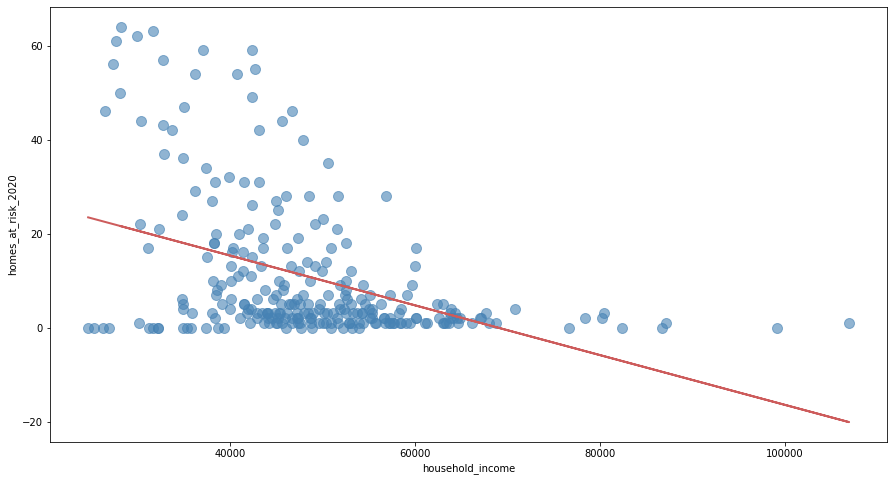

In [16]:
#setting variables
x = fsf_countyFiltered[['household_income']].values
y = fsf_countyFiltered[['homes_at_risk_2020']].fillna(0).values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('household_income')
plt.ylabel('homes_at_risk_2020')

### make the scatter in Blue
plt.scatter(x,y,color='steelblue',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

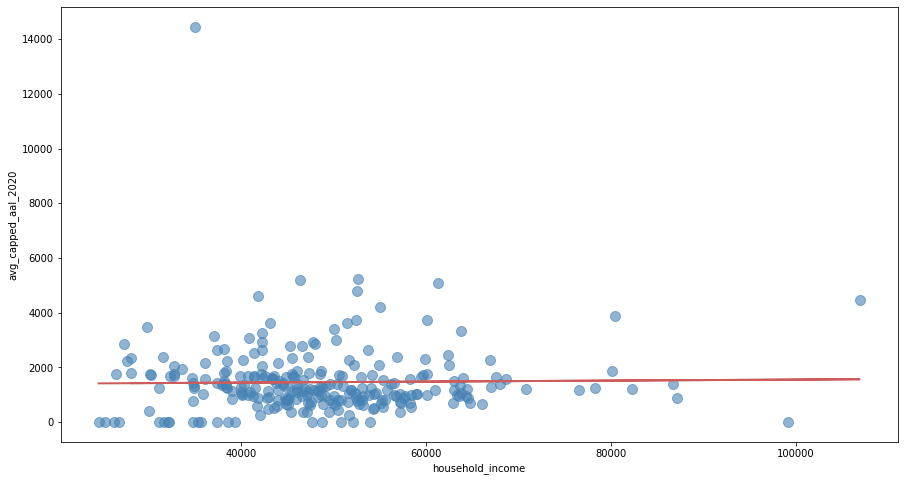

In [17]:
#setting variables
x = fsf_countyFiltered[['household_income']].values
y = fsf_countyFiltered[['avg_capped_aal_2020']].fillna(0).values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('household_income')
plt.ylabel('avg_capped_aal_2020')

### make the scatter in Blue
plt.scatter(x,y,color='steelblue',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

In [18]:
fsf_countyFiltered["loss_premium_diff"] = fsf_countyFiltered['avg_capped_aal_2020'].dropna() - fsf_countyFiltered['avg_nfip_premium_per_property_with_structural_damage'].dropna().str.replace(",", "").astype(int)

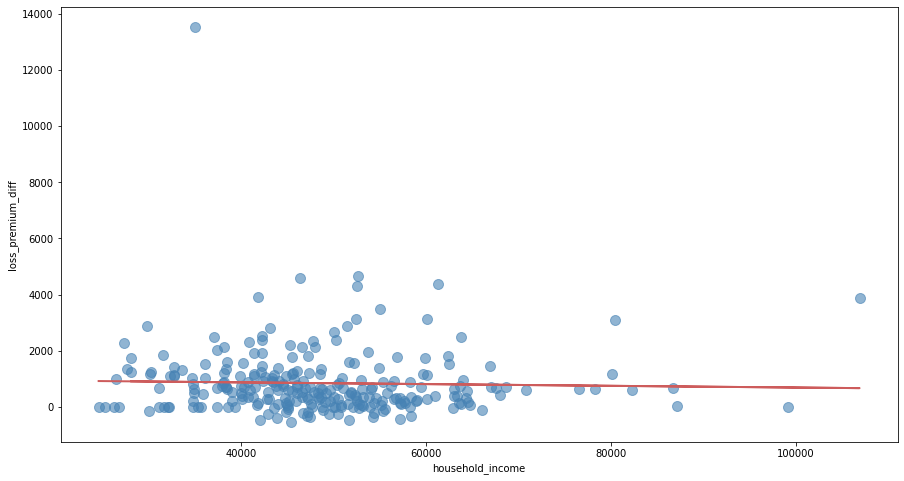

In [19]:


#setting variables
x = fsf_countyFiltered[['household_income']].values
y = fsf_countyFiltered[['loss_premium_diff']].fillna(0).values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('household_income')
plt.ylabel('loss_premium_diff')

### make the scatter in Blue
plt.scatter(x,y,color='steelblue',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

In [20]:
fsf_countyFiltered['avg_nfip_premium_per_property_with_structural_damage'] = fsf_countyFiltered['avg_nfip_premium_per_property_with_structural_damage'].str.replace(",", "")

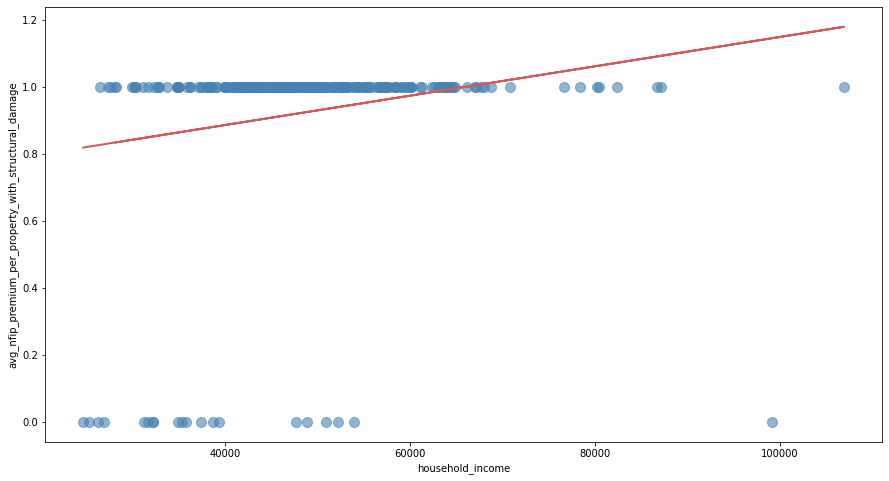

In [50]:
#setting variables
x = fsf_countyFiltered[['household_income']].values
y = fsf_countyFiltered[['avg_nfip_premium_per_property_with_structural_damage']].fillna(0).values.astype(int)> 0

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('household_income')
plt.ylabel('avg_nfip_premium_per_property_with_structural_damage')

### make the scatter in Blue
plt.scatter(x,y,color='steelblue',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

In [51]:
fsf_countyFiltered[['avg_nfip_premium_per_property_with_structural_damage']]

,avg_nfip_premium_per_property_with_structural_damage
76,616
65,543
66,580
234,858
262,606
57,641
35,629
12,581
218,601
210,816


In [58]:
fsf_countyFiltered[fsf_countyFiltered['avg_nfip_premium_per_property_with_structural_damage'] > '5000']

,county_name,state,FIPS,household_income,avg_nfip_premium_per_property_with_structural_damage,homes_at_risk_2020,homes_at_risk_2050,avg_capped_aal_2020,loss_premium_diff
76,"Martin County, Kentucky",KY,21159,28147,616,64.0,64.0,2342.0,1726.0
65,"Leslie County, Kentucky",KY,21131,31627,543,63.0,64.0,2396.0,1853.0
66,"Letcher County, Kentucky",KY,21133,29886,580,62.0,62.0,3462.0,2882.0
234,"McDowell County, West Virginia",WV,54047,27682,858,61.0,60.0,2221.0,1363.0
262,"Wyoming County, West Virginia",WV,54109,42332,606,59.0,59.0,2059.0,1453.0
57,"Johnson County, Kentucky",KY,21115,37055,641,59.0,59.0,3136.0,2495.0
35,"Floyd County, Kentucky",KY,21071,32730,629,57.0,57.0,2062.0,1433.0
12,"Breathitt County, Kentucky",KY,21025,27344,581,56.0,56.0,2842.0,2261.0
218,"Gilmer County, West Virginia",WV,54021,42636,601,55.0,55.0,1671.0,1070.0
210,"Boone County, West Virginia",WV,54005,40739,816,54.0,54.0,1692.0,876.0


In [60]:
## set up for stats models
x_stats = fsf_countyFiltered[['household_income']].values
y_stats = fsf_countyFiltered[['homes_at_risk_2020']].fillna(0).values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     57.53
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           5.87e-13
Time:                        13:07:29   Log-Likelihood:                -1059.1
No. Observations:                 263   AIC:                             2122.
Df Residuals:                     261   BIC:                             2129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4827      3.491     10.449      0.000      29.608      43.358
x1            -0.0005   6.98e-05     -7.585      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       66.490   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.289
Skew:                           1.371   Prob(JB):                     3.40e-26
Kurtosis:                       4.784   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

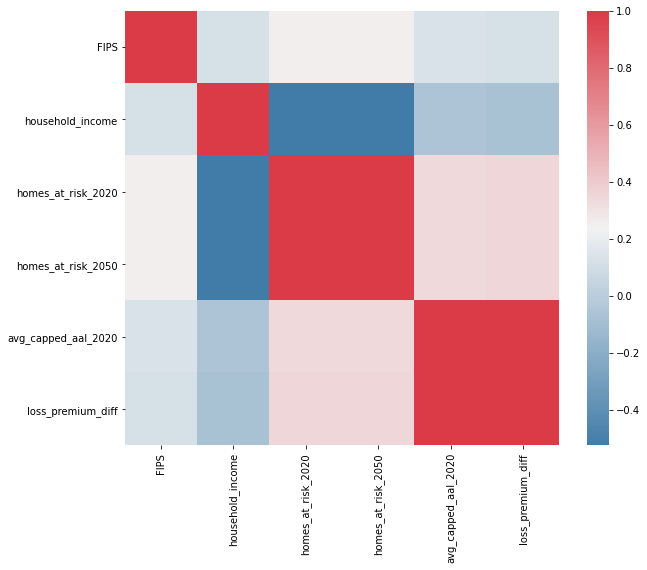

In [64]:

f, ax = plt.subplots(figsize=(10, 8))
corr = fsf_countyFiltered.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [66]:
fsf_countyFiltered

,county_name,state,FIPS,household_income,avg_nfip_premium_per_property_with_structural_damage,homes_at_risk_2020,homes_at_risk_2050,avg_capped_aal_2020,loss_premium_diff
76,"Martin County, Kentucky",KY,21159,28147,616,64.0,64.0,2342.0,1726.0
65,"Leslie County, Kentucky",KY,21131,31627,543,63.0,64.0,2396.0,1853.0
66,"Letcher County, Kentucky",KY,21133,29886,580,62.0,62.0,3462.0,2882.0
234,"McDowell County, West Virginia",WV,54047,27682,858,61.0,60.0,2221.0,1363.0
262,"Wyoming County, West Virginia",WV,54109,42332,606,59.0,59.0,2059.0,1453.0
57,"Johnson County, Kentucky",KY,21115,37055,641,59.0,59.0,3136.0,2495.0
35,"Floyd County, Kentucky",KY,21071,32730,629,57.0,57.0,2062.0,1433.0
12,"Breathitt County, Kentucky",KY,21025,27344,581,56.0,56.0,2842.0,2261.0
218,"Gilmer County, West Virginia",WV,54021,42636,601,55.0,55.0,1671.0,1070.0
210,"Boone County, West Virginia",WV,54005,40739,816,54.0,54.0,1692.0,876.0


In [74]:
fsf[['county_name', 'household_income','pct_change_in_properties_with_structural_damage']].sort_values("pct_change_in_properties_with_structural_damage")

,county_name,household_income,pct_change_in_properties_with_structural_damage
205,"Williams County, Ohio",53183,-2.7
234,"McDowell County, West Virginia",27682,-1.0
260,"Wirt County, West Virginia",46048,-0.9
229,"Lincoln County, West Virginia",42345,-0.8
120,"Adams County, Ohio",39079,-0.8
157,"Holmes County, Ohio",63753,-0.4
215,"Clay County, West Virginia",35024,-0.3
216,"Doddridge County, West Virginia",45545,0.0
42,"Grayson County, Kentucky",38612,0.0
200,"Van Wert County, Ohio",54254,0.0


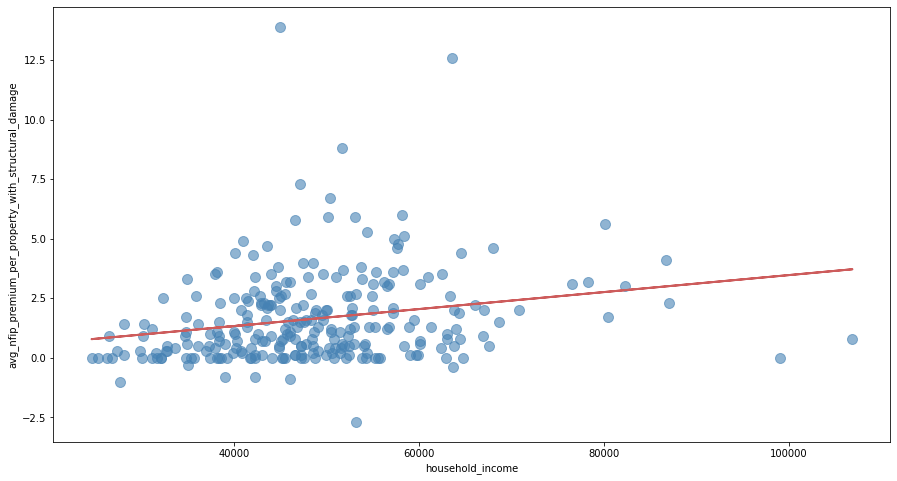

In [75]:
#setting variables
x = fsf[['household_income']].values
y = fsf[['pct_change_in_properties_with_structural_damage']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('household_income')
plt.ylabel('avg_nfip_premium_per_property_with_structural_damage')

### make the scatter in Blue
plt.scatter(x,y,color='steelblue',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

In [85]:
fsf_countyFiltered[fsf_countyFiltered["state"] == 'WV'][['state', 'county_name', 'FIPS', 'homes_at_risk_2020']].to_csv("wv_homes_at_risk.csv", index=False)

In [88]:
fsf[fsf["county_name"] == "Knott County, Kentucky"]

,County,county_name,household_income,residential_properties,res_properties_with_substantial_risk,properties_with_structural_damage_2020,pct_properties_with_structural_damage_2020,properties_with_structural_damage_2050,pct_properties_with_structural_damage_2050,change_in_properties_with_structural_damage,pct_change_in_properties_with_structural_damage,total_aal_2020,avg_aal_2020,capped_aal_2020,avg_capped_aal_2020,total_aal_2050,total_all_2050,avg_aal_2050,capped_aal_2050,avg_capped_aal_2050,change_in_total_all,pctChange_in_total_aal,change_in_avg_aal,change_in_capped_aal,pctChange_in_capped_aal,change_in_capped_avg_aal,total_avm,total_structure_svm,avg_avm,avg_structure_avm,total_avm_with_substantial_risk,total_structure_avm_with_substantial_risk,avg_avm_with_substantial_risk,avg_structure_avm_with_substantail_risk,pct_structure_avm_with_substantial_risk_2020,pct_structure_avm_with_substantial_risk_2050,pctChange_in_structure_avm_with_substaintial_risk,avg_nfip_premium_per_property_with_structural_damage,aal_to_nfip_ratio_in_pct_2020,aal_to_nfip_ratio_in_pct_2050,FIPS,Lat,Long,state,homes_at_risk_2020,homes_at_risk_2050
59,Knott County,"Knott County, Kentucky",31198,NaN,NaN,0,0.0,NaN,0.0,NaN,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,21119,37.36,-82.946,KY,NaN,NaN
